# Modelos de difusão

Os modelos de difusão podem ser utilizados para entender como doenças se espalham, como notícias ou boatos se propagam, como opiniões sobre determinados temas são formadas, ou como o consumo de determinados produtos ou serviços são adotados.

In [2]:
import networkx as nx
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

## Tamanho das componentes e imunidade

Se o processo de difusão inicia em um único vértice, ele só conseguirá contagiar os vértices que estão na mesma componente desse vértice. 

O processo de difusão só atingirá uma fração significativa dos nós se houver uma componente gigante. 

É importante estudar o comportamento dos tamanhos das componentes para o processo de difusão. 

Aqui abordaremos o problema em que temos um indivíduo infectado e queremos determinar o espalhamento desta doença na rede quando uma certa fração aleatória, $f$, de indivíduos é imune a doença e, portanto, é removida da rede. 

O problema da difusão da doença, corresponde a saber se o indivíduo inicialmente infectado está em uma componente que contém uma fração considerável dos vértices, após a remoção dos indivíduos imunes.

### Exemplo

Considere uma rede de Erdös-Renyi com $n$ nós e uma probabilidade de ligação $p$.

A componente gigante não se formará, somente, se mais da metade da população for imunizada para $p = \frac{2}{(n-2)}$.

In [3]:
rng = default_rng()

M = 100 
V = 19 # número de simulações
n = 1000 # número de nodes
p = 2/(n-2) # probabilidade

In [4]:
f = np.linspace(0,0.9,V) # retornar números uniformemente espaçados em um intervalo especificado
Fcomp = np.zeros(V) # vetor do tamanho (max) media componentes conexa encontrada

In [5]:
for v in range(V):
    fcomp = np.zeros(M)
    m = int(np.round(n*f[v],0)) # arredondar um vetor para o número fornecido de decimais
    for k in range(M):
        G = nx.fast_gnp_random_graph(n,p) # um grafo aleatorio $G_{n,p}$ (Erdős-Rényi)
        j = rng.choice(n,m,replace=False) # gera uma amostra aleatória de uma determinada vetor
        G.remove_nodes_from(j)
        fcomp[k] = len(max(nx.connected_components(G),key=len))/n #  tamanho da maior componete conexa
    Fcomp[v] = np.mean(fcomp) # tamanho (max) medio das componentes conexas geradas
    print(v,Fcomp[v])


0 0.7963300000000001
1 0.7265999999999999
2 0.66345
3 0.58894
4 0.5103000000000002
5 0.43085999999999997
6 0.34324
7 0.24704
8 0.16875
9 0.1075
10 0.05623
11 0.036050000000000006
12 0.021870000000000004
13 0.0151
14 0.01137
15 0.00834
16 0.005980000000000001
17 0.004600000000000001
18 0.0032100000000000006


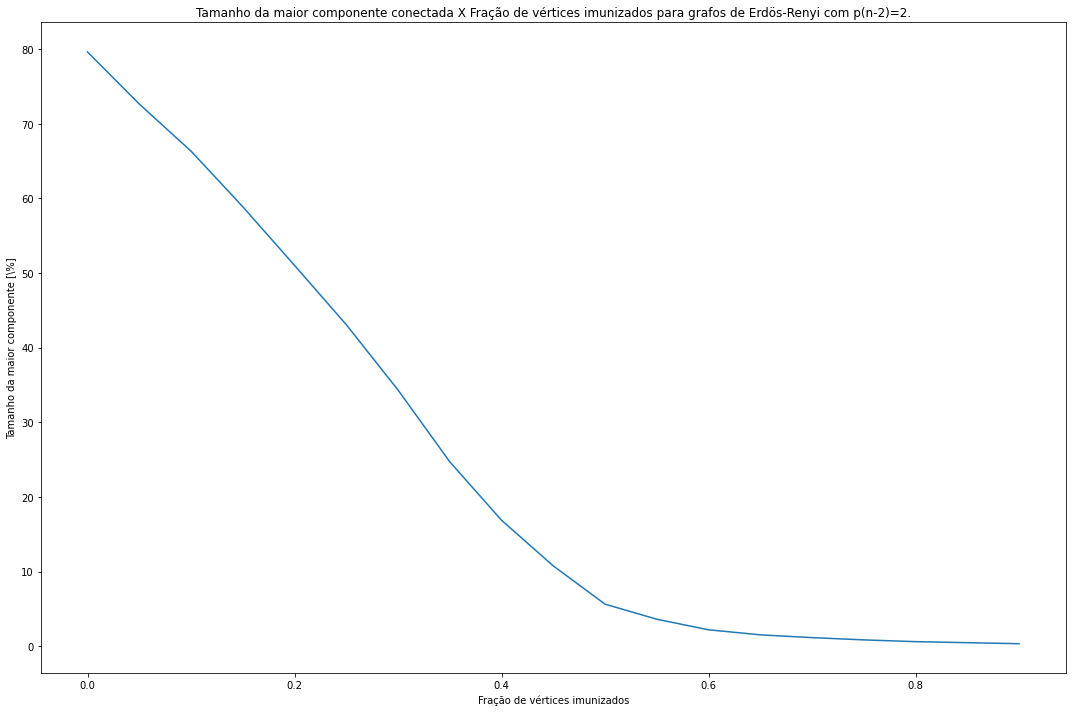

In [6]:
fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(f,100*Fcomp)
plt.xlabel('Fração de vértices imunizados')
plt.ylabel('Tamanho da maior componente [\%]')
plt.title('Tamanho da maior componente conectada X Fração de vértices imunizados para grafos de Erdös-Renyi com p(n-2)=2.')

plt.tight_layout()
plt.show()

Quando a fração de nós removidos(imunizados) supera $50\%$, o tamanho da maior componente conectada é menor, em média, a $1\%$ do tamanho total da rede.